In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-dataset-tarik-a-rashid/Medicaldataset.csv


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve, auc, RocCurveDisplay, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC




In [32]:
# Load the dataset
df = pd.read_csv('/kaggle/input/heart-attack-dataset-tarik-a-rashid/Medicaldataset.csv')

# Display first 5 rows
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [33]:
df.tail()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [35]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [36]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [37]:
df.duplicated().sum()

0

In [38]:
df.shape

(1319, 9)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


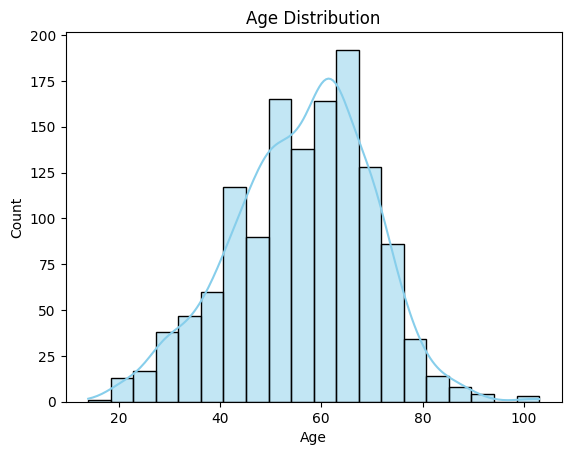

In [39]:
# 1. Distribution of Age
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* The histogram shows almost a symmetrical bell-shaped curve, centered around age 60. This suggests that the age variable is normally distributed, which is useful for many statistical and machine learning models that assume normality.

* The highest concentration of patients falls in the 55–65 age range, which likely represents the most at-risk age group for the medical condition under study

* There's a relatively balanced spread of patients on both sides of the mean (no skewness), with fewer patients at the extreme young and old ends (below 30 or above 80).


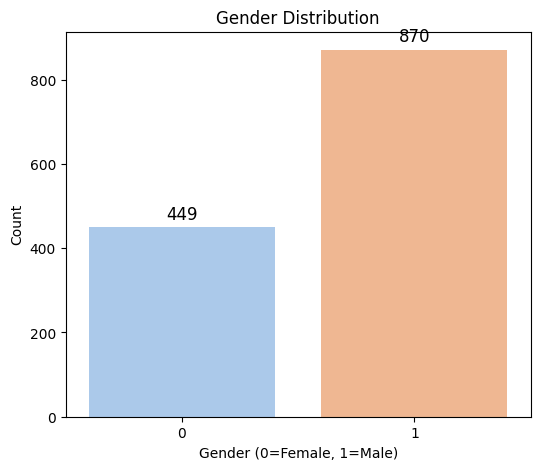

In [40]:
# 2. Gender distribution
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Gender', data=df, palette='pastel')
ax.bar_label(ax.containers[0], label_type='edge', padding=3, fontsize=12)
plt.title('Gender Distribution')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Count')
plt.show()

The bar chart reveals a noticeable gender imbalance in the dataset, with males accounting for 870 entries and females for only 449 entries. This suggests that males are nearly twice as represented as females in the collected medical data. 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


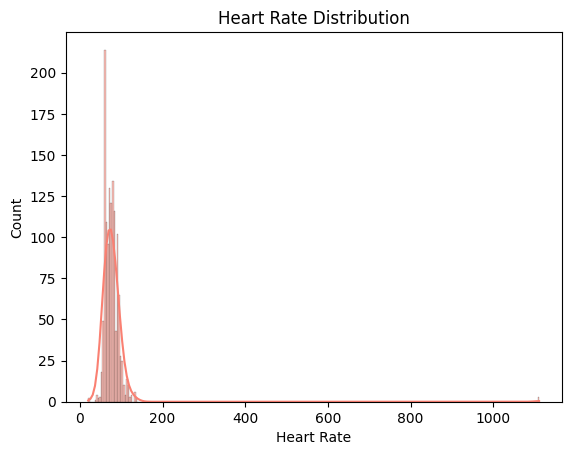

In [41]:
# 3. Heart rate distribution
sns.histplot(df['Heart rate'], kde=True, color='salmon')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.show()

Peak at 70–90 bpm: Most patients fall within the normal resting heart rate range (60–100 bpm).

Right Tail (High Heart Rate): Some cases exceed 100 bpm

Left Tail (Low Heart Rate): A few cases below 60 bpm

Extreme heart rates (very high) which indicate outlier.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


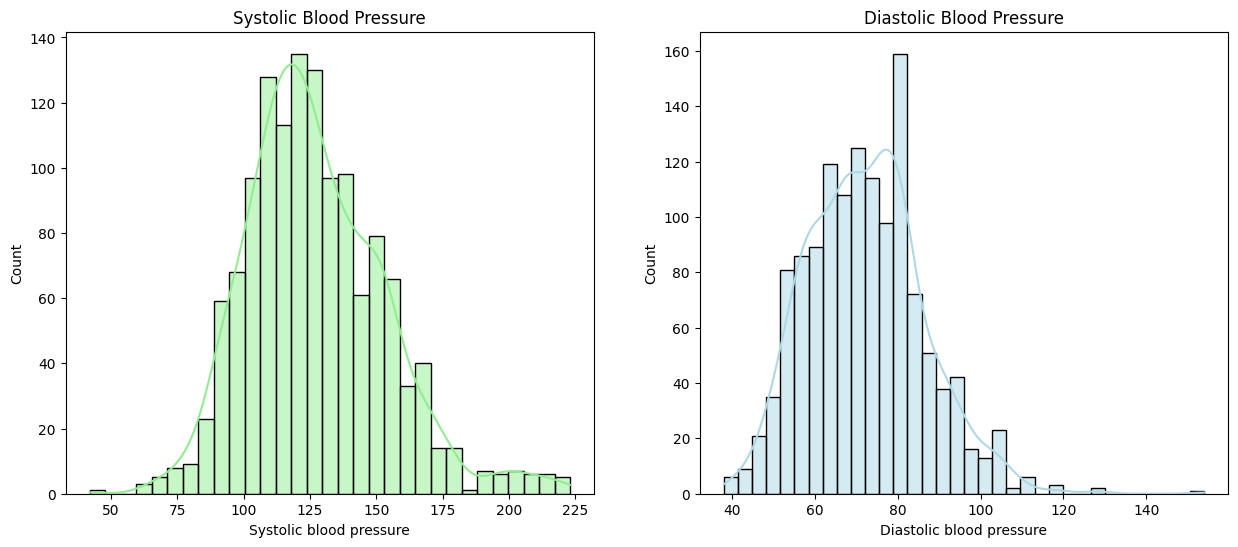

In [42]:
# 4. Systolic & Diastolic blood pressure
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df['Systolic blood pressure'], kde=True, ax=ax[0], color='lightgreen')
ax[0].set_title('Systolic Blood Pressure')
sns.histplot(df['Diastolic blood pressure'], kde=True, ax=ax[1], color='lightblue')
ax[1].set_title('Diastolic Blood Pressure')
plt.show()

Systolic BP:

Main peak at 120-140 (normal to stage 1 hypertension) long tail beyond 140 shows hypertensive patients


Diastolic BP:

Concentrated at 70-90. few extreme highs (>100)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


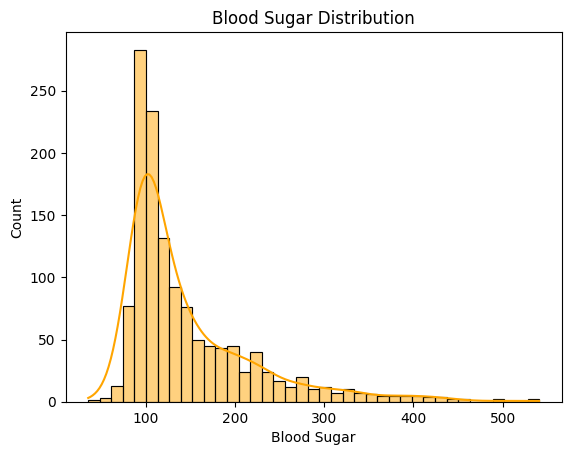

In [43]:
# 5. Blood Sugar
sns.histplot(df['Blood sugar'], kde=True, color='orange')
plt.title('Blood Sugar Distribution')
plt.xlabel('Blood Sugar')
plt.ylabel('Count')
plt.show()

Most patients have normal to slightly elevated levels (<150)

A long tail of diabetic patients (>200)

Some extreme values (>300) that may represent emergencies

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


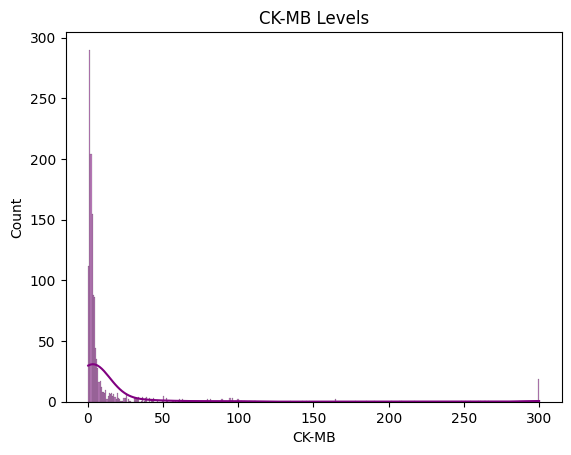

In [44]:
# 6. CK-MB Levels
sns.histplot(df['CK-MB'], kde=True, color='purple')
plt.title('CK-MB Levels')
plt.xlabel('CK-MB')
plt.ylabel('Count')
plt.show()

Most values <5 (normal)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


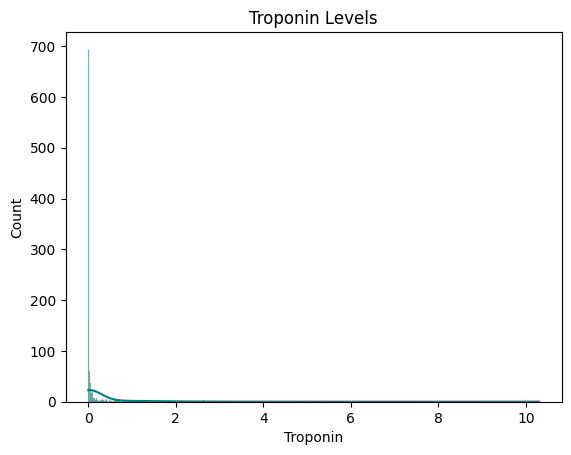

In [45]:
# 7. Troponin Levels
sns.histplot(df['Troponin'], kde=True, color='teal')
plt.title('Troponin Levels')
plt.xlabel('Troponin')
plt.ylabel('Count')
plt.show()

Most values near zero (healthy)

Extreme highs indicate massive heart attacks

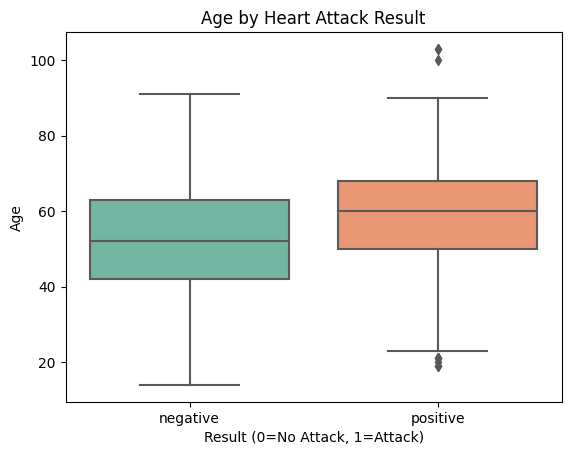

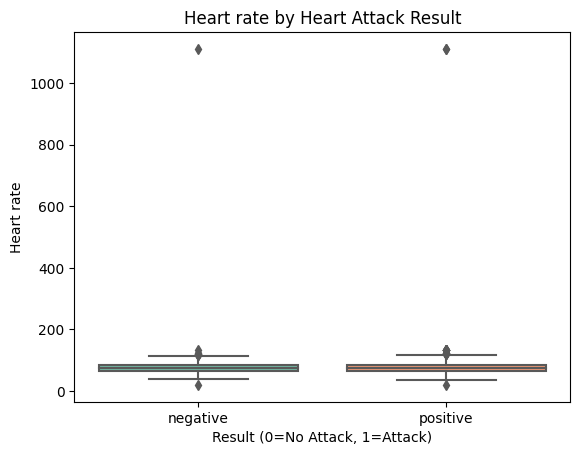

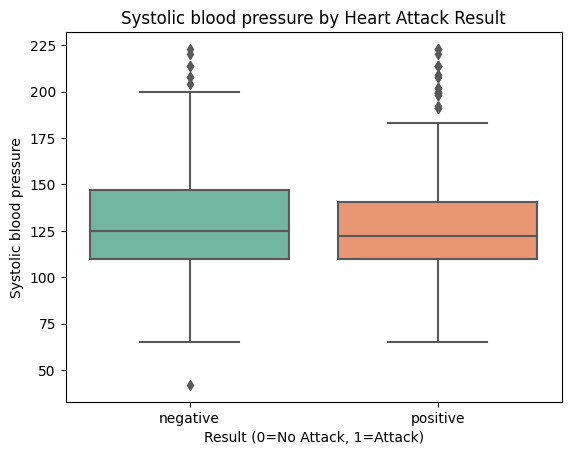

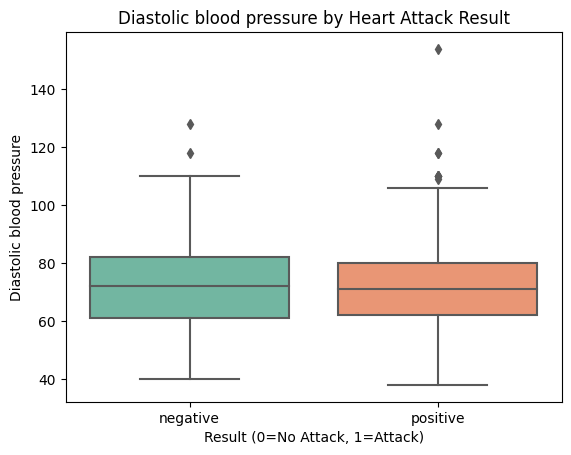

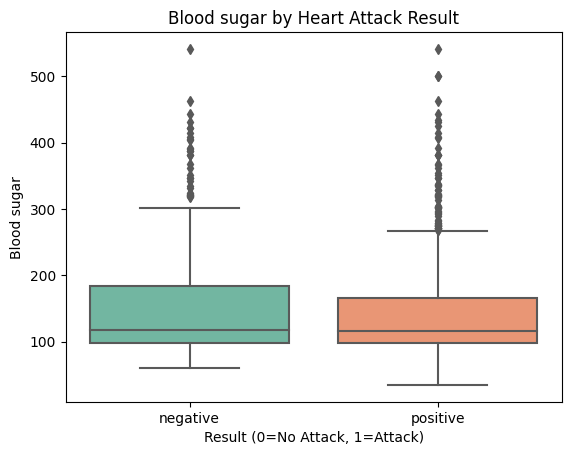

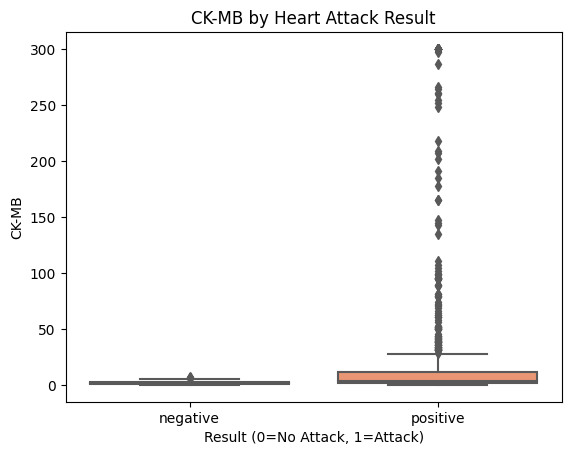

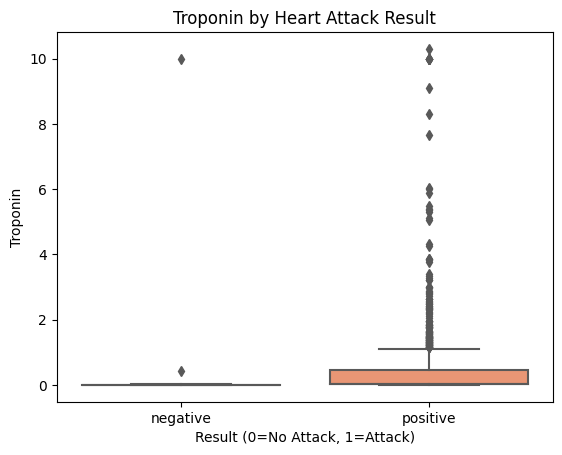

In [46]:
# 8. Boxplots for comparing features across Result
features = ['Age', 'Heart rate', 'Systolic blood pressure',
            'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

for col in features:
    sns.boxplot(x='Result', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Heart Attack Result')
    plt.xlabel('Result (0=No Attack, 1=Attack)')
    plt.ylabel(col)
    plt.show()

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

skewed_features = ['Troponin', 'CK-MB', 'Blood sugar', 'Heart rate']
for feature in skewed_features:
    df = remove_outliers_iqr(df, feature)

In [47]:
# Encode 'Result' column (binary classification)
label_encoder = LabelEncoder()
df['Result'] = label_encoder.fit_transform(df['Result'])

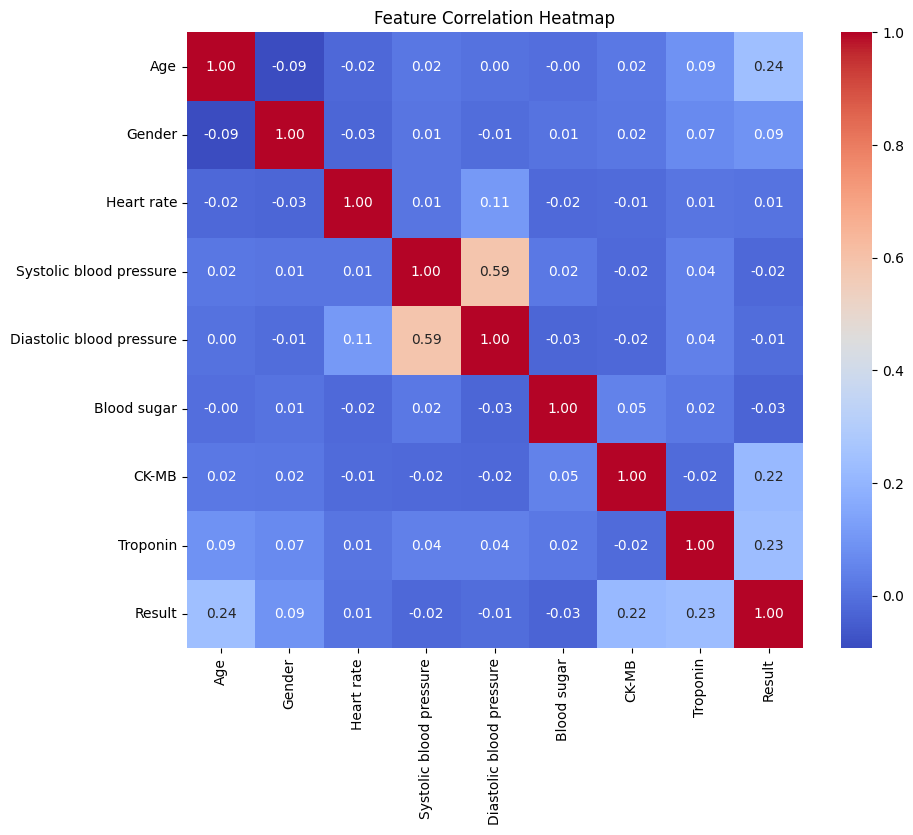

In [48]:
# Convert 'Gender' if it's also in string form
if df['Gender'].dtype == object:
    df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Drop any non-numeric columns just to be safe
numeric_df = df.select_dtypes(include=['number'])

# Now compute correlation
plt.figure(figsize=(10, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

Age (0.24): Moderate positive correlation

* Older patients are more likely to have heart attacks


Troponin (0.23) & CK-MB (0.22): 

* Troponin shows slightly better correlation than CK-MB


Blood sugar shows a negative correlation (-0.03) with heart attack, which contradicts medical expectations. This might indicate: Data quality issues in recording



In [49]:
# Scale features
X = df.drop(columns='Result')
y = df['Result']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
model = LogisticRegression(max_iter=1000)

In [53]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(conf_matrix)

Accuracy: 0.7954545454545454
Recall: 0.8588957055214724
[[ 70  31]
 [ 23 140]]


In [55]:
# Define a dictionary of classification models
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(probability=True, random_state=42),
}

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
results = {}

for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    results[name] = {
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    }

In [58]:
for model_name, metrics in results.items():
    print(f"\n \n {model_name}")
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("ROC AUC:", round(metrics["ROC AUC"], 3))
    print("Classification Report:")
    print(classification_report(y_test, classification_models[model_name].predict(X_test)))


 
 Logistic Regression
Confusion Matrix:
 [[ 73  29]
 [ 24 138]]
ROC AUC: 0.888
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       102
           1       0.83      0.85      0.84       162

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.79       264
weighted avg       0.80      0.80      0.80       264


 
 Random Forest Classifier
Confusion Matrix:
 [[100   2]
 [  2 160]]
ROC AUC: 0.994
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264


 
 Decision Tree Classifier
Confusion Matrix:
 [[ 99   3]
 [  2 160]]
ROC AUC: 0.979
Classification Report:
              precision 